# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [2]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [3]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [11]:
data = pd.read_csv("assignment2_train_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [80]:
numeric_df = data.select_dtypes(include='number')
df = numeric_df.drop(["Unnamed: 0"], axis=1)
df=df.dropna()
lower_bound = np.percentile(data['Price'], 1)
upper_bound = np.percentile(data['Price'], 99)
outlier_mask = (df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)
df = df[outlier_mask]

In [81]:
df.isna().sum().to_frame('nan_count')

,nan_count
Year,0
Kilometers_Driven,0
Seats,0
Price,0


In [82]:
X = df.drop(["Price"], axis=1)
y = df.Price
X = X.to_numpy()
y = y.to_numpy()

In [100]:
X1 = df.Year
X1 = X1.to_numpy()

X1 = X1.reshape(-1,1)
Y1 = y.reshape(-1,1)

In [84]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
model.score(X, y)
print("가중치(계수, 기울기 파라미터 W) :", model.coef_)
print("편향(절편 파라미터 b) :", model.intercept_)

print("훈련세트 점수: {:.2f}".format( model.score(X, y) ))


가중치(계수, 기울기 파라미터 W) : [ 8.48210772e-01 -1.12698496e-05  1.24398528e+00]
편향(절편 파라미터 b) : -1704.7940995930933
훈련세트 점수: 0.11


In [101]:
model.fit(X1,y)
model.score(X1,y)

0.09514366170023791

In [92]:
import statsmodels.api as sm
results = sm.OLS(y, sm.add_constant(X)).fit()
results.summary() 
#p-value값은 일단 0.05보다 작음
#근데 설명력 너무 낮음. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     232.5
Date:                Wed, 02 Aug 2023   Prob (F-statistic):          1.55e-142
Time:                        16:05:20   Log-Likelihood:                -21018.
No. Observations:                5863   AIC:                         4.204e+04
Df Residuals:                    5859   BIC:                         4.207e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1704.7941     82.471    -20.672      0.000   -1866.467   -1543.121
x1             0.8482      0.041     20.710      0.000       0.768       0.928
x2         -1.127e-05   3.47e-06     -3.247      0.001   -1.81e-05   -4.47e-06
x3             1.2440      0.146      8.494      0.000       0.957       1.531
==============================================================================
Omnibus:                     2805.379   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14051.419
Skew:                           2.343   Prob(JB):                         0.00
Kurtosis:                       8.963   Cond. No.                     4.99e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.99e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

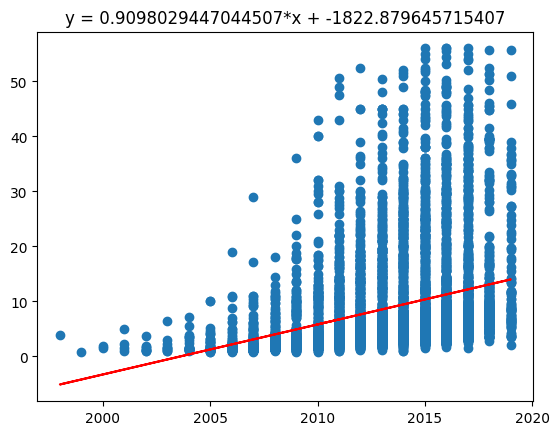

In [124]:
plt.scatter(X1, Y1)
plt.plot(X1, model.coef_[0] * X1 +  model.intercept_, color='red')
plt.title('y = {}*x + {}'.format(model.coef_[0], model.intercept_))
plt.show()
#가장 year의 score이 높아서 year로 그림. 

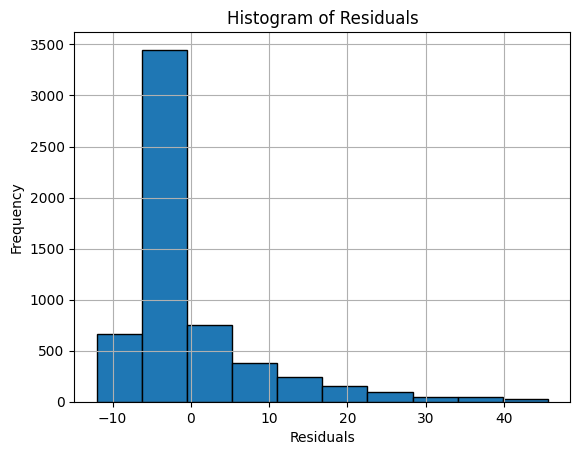

In [125]:
pred_y=model.coef_[0] * X1 +  model.intercept_
residuals = Y1 - pred_y
plt.hist(residuals, bins=10, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()
#정규성 안지켜짐

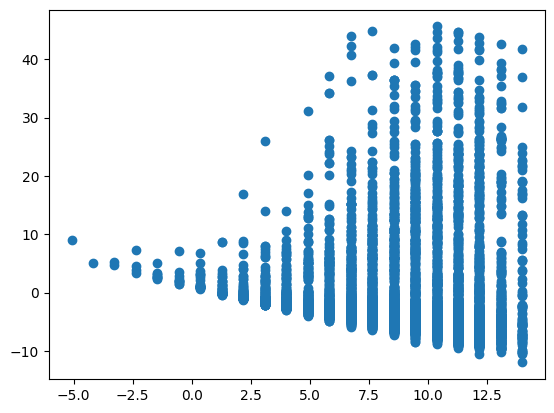

In [127]:
plt.scatter(pred_y,residuals)
#등분산성 만족하지 않고,패턴이 점점 많아지는 패턴이 있으므로 독립성도 성립 안된다.

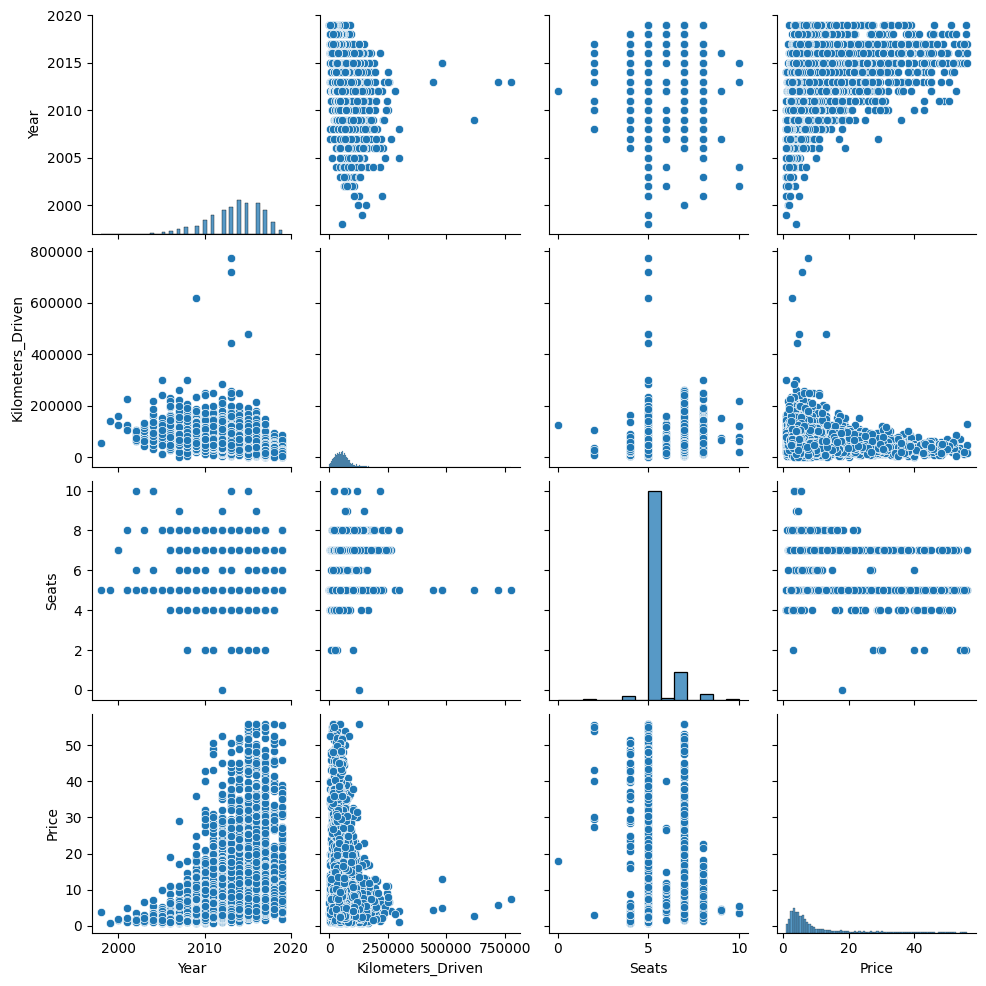

In [128]:
sns.pairplot(df)
#딱히 다른 독립변수와 상관관계는 없어 보인다.